# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [2]:
"""
Jumlah baris dan kolom: Dataset memiliki 2000 baris dan 8 kolom.

Jenis data:
    Numerikal: CustomerID, Age, Annual Income ($), Spending Score (1-100), Work Experience, Family Size.
    Kategorikal: Gender, Profession.
"""

'\nJumlah baris dan kolom: Dataset memiliki 2000 baris dan 8 kolom.\nJenis data:\nNumerikal: CustomerID, Age, Annual Income ($), Spending Score (1-100), Work Experience, Family Size.\nKategorikal: Gender, Profession.\n'

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
data= pd.read_csv("C:/Users/ACER/Data/Customers.csv")
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
data.info() 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [12]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


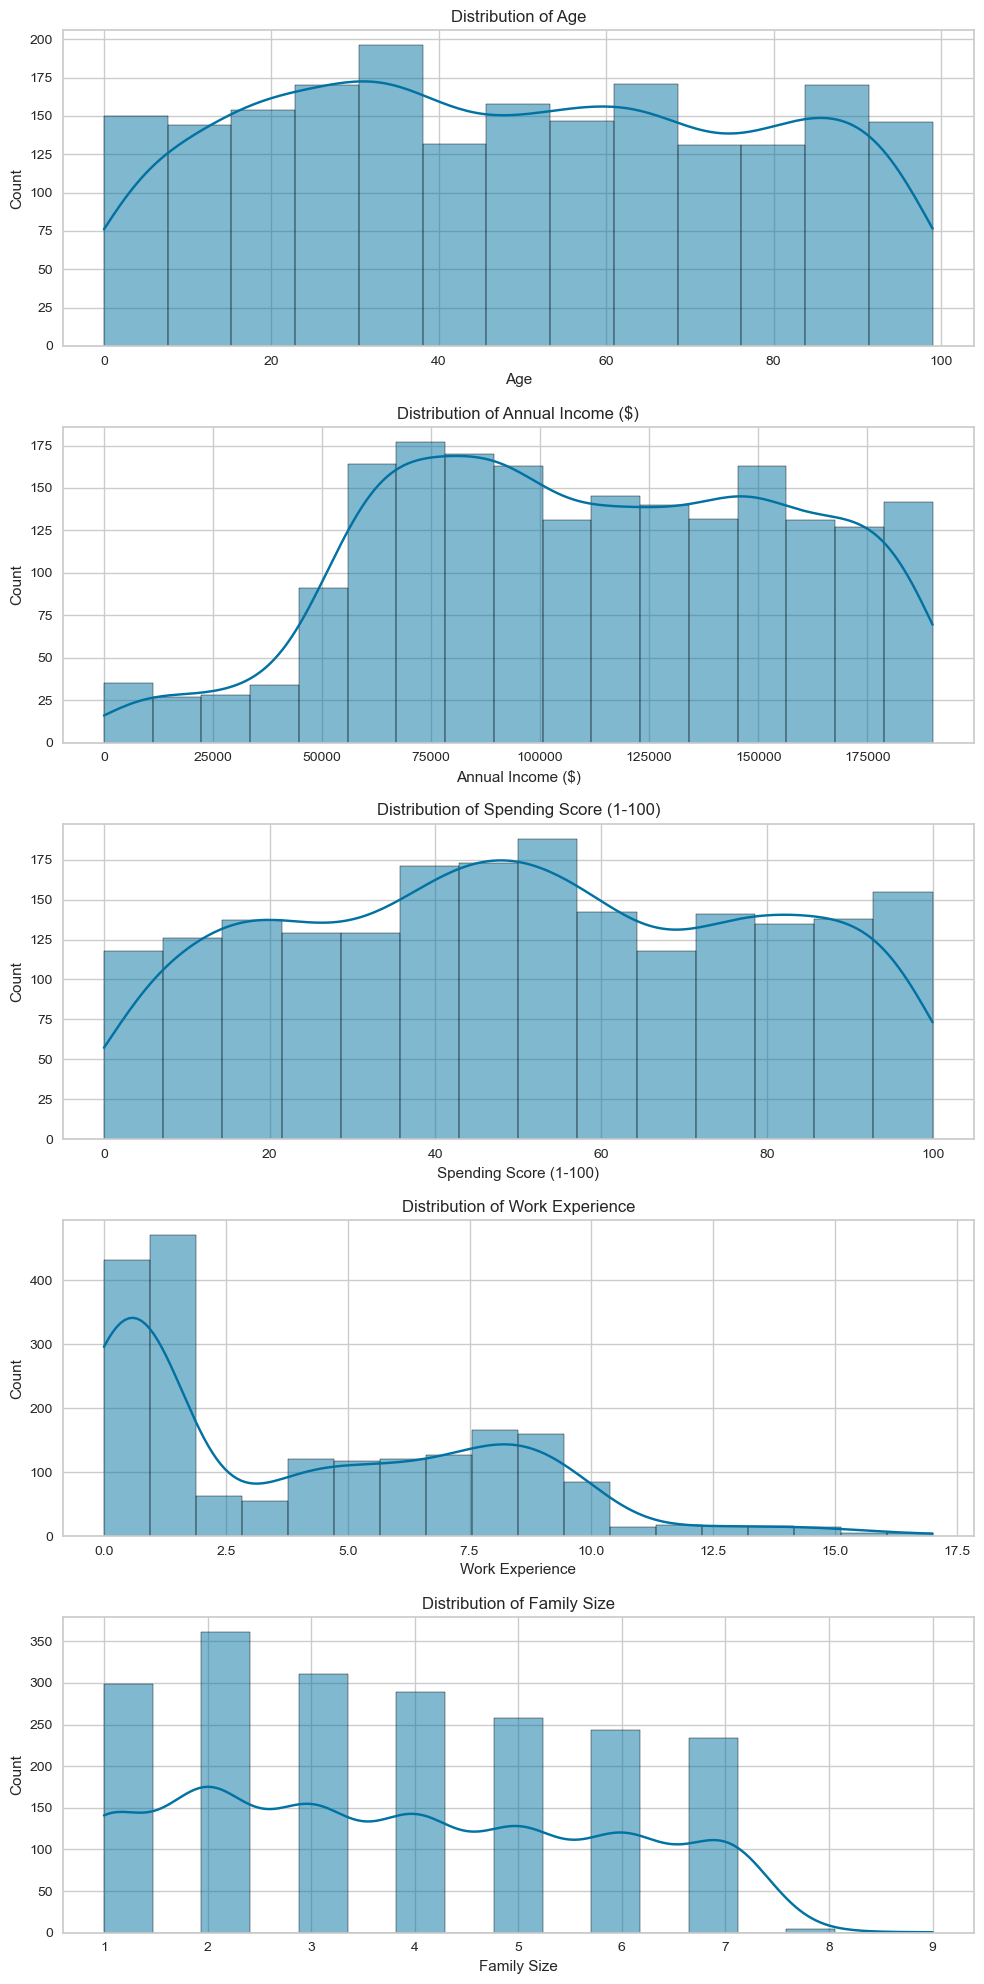

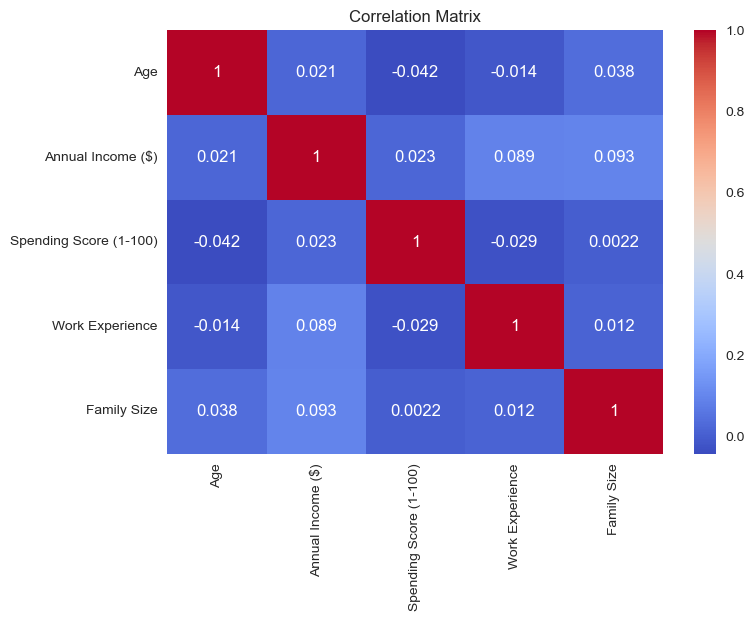

In [49]:
# Distribusi kolom numerik
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Korelasi antar variabel numerik
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

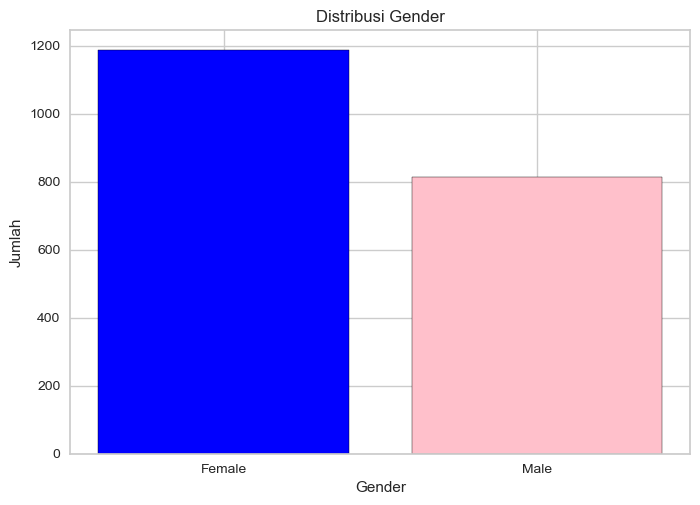

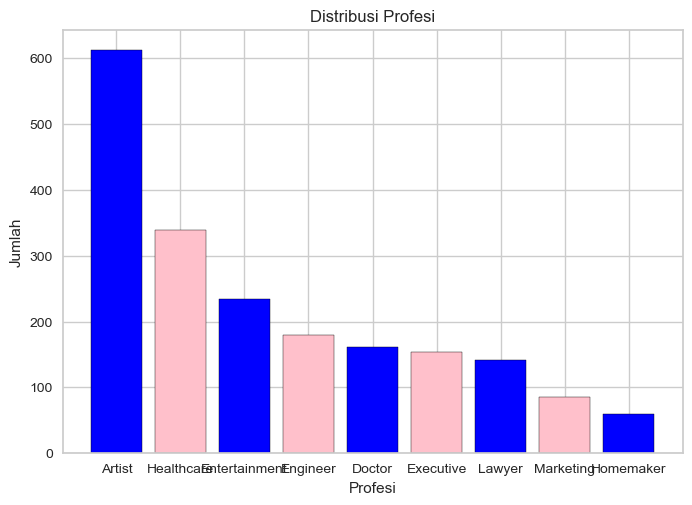

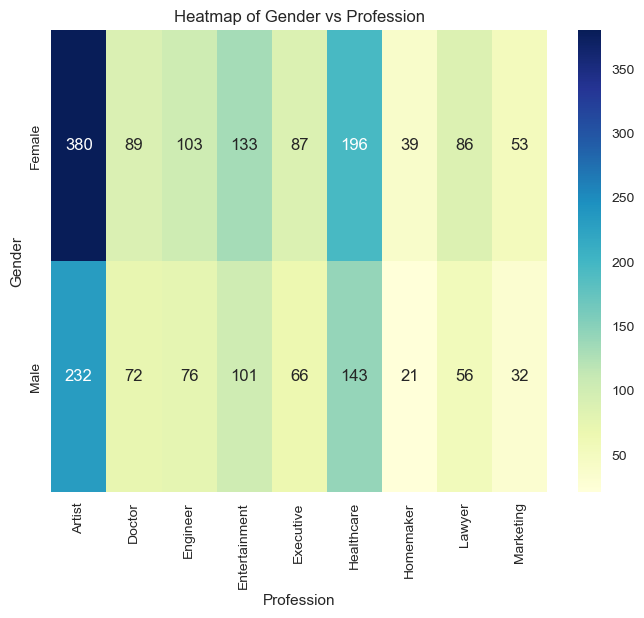

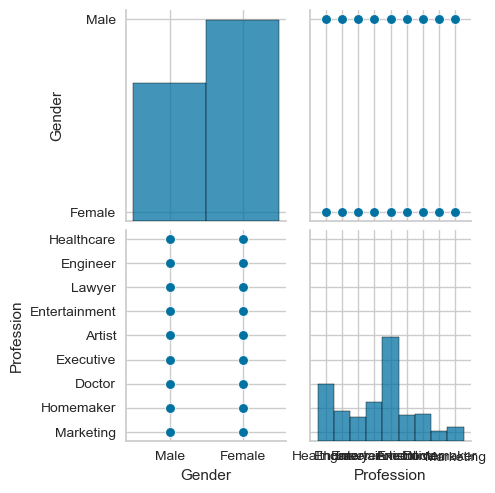

In [16]:
#Visualisasi untuk variabel kategorikal

gender_counts = data['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'], edgecolor='black')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

profession_counts = data['Profession'].value_counts()

plt.bar(profession_counts.index, profession_counts.values, color=['blue', 'pink'], edgecolor='black')
plt.title('Distribusi Profesi')
plt.xlabel('Profesi')
plt.ylabel('Jumlah')
plt.show()

# Korelais antar variabel kategorikal
# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat crosstab untuk Gender dan Profession
cross_tab = pd.crosstab(df['Gender'], df['Profession'])

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Gender vs Profession')
plt.xlabel('Profession')
plt.ylabel('Gender')
plt.show()

# Pairplot untuk hubungan antar variabel
categorical_columns = ['Gender','Profession']

sns.pairplot(data, vars=categorical_columns)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [17]:
# Fill missing values in 'Profession' with the mode of the column
mode_profession = data['Profession'].mode()[0]
data['Profession'].fillna(mode_profession, inplace=True)

# Verify no missing values remain
missing_values_after = data.isnull().sum()
missing_values_after

# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male=1, Female=0
data['Profession'] = label_encoder.fit_transform(data['Profession'])

# Final dataset for clustering
data.head()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


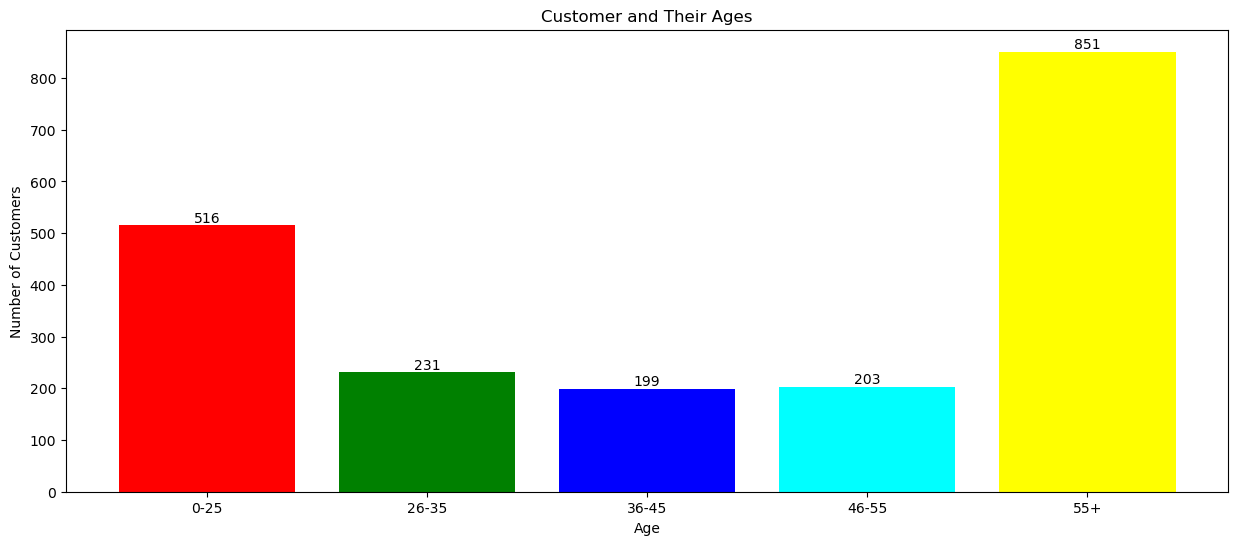

In [27]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age0_25 = data.Age[(data.Age >= 0) & (data.Age <= 25)]
age26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age55above = data.Age[data.Age >= 56]
 
# Menyusun data untuk plotting
x = ["0-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age0_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
 
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

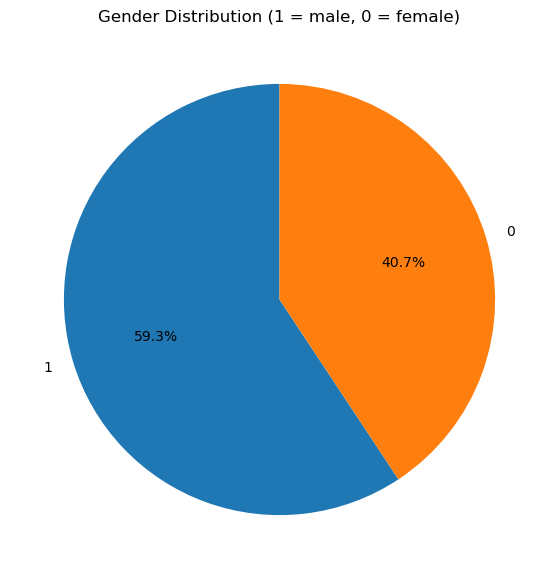

In [29]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['1', '0'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution (1 = male, 0 = female)')
plt.show()

In [19]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = data.iloc[:, [1, 3]].values
 
# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
df = pd.DataFrame(X, columns=['Gender (1 = Male, 0 = Female)', 'Annual Income($)'])
print(df)

      Gender (1 = Male, 0 = Female)  Annual Income($)
0                                 1             15000
1                                 1             35000
2                                 0             86000
3                                 0             59000
4                                 0             38000
...                             ...               ...
1995                              0            184387
1996                              0             73158
1997                              1             90961
1998                              1            182109
1999                              1            110610

[2000 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
from sklearn.cluster import KMeans
from scipy.stats import mode
 
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 3
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mode_gender = mode(cluster_data[:, 0], keepdims=True).mode[0]  # Modus Gender
        mean_income = cluster_data[:, 1].mean()  # Rata-rata Annual Income
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Modus Gender: {mode_gender:.2f}")
        print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Modus Gender: 0.00
Rata-rata Annual Income (k$): 106033.98

Cluster 2:
Modus Gender: 0.00
Rata-rata Annual Income (k$): 161639.66

Cluster 3:
Modus Gender: 0.00
Rata-rata Annual Income (k$): 56164.80


c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

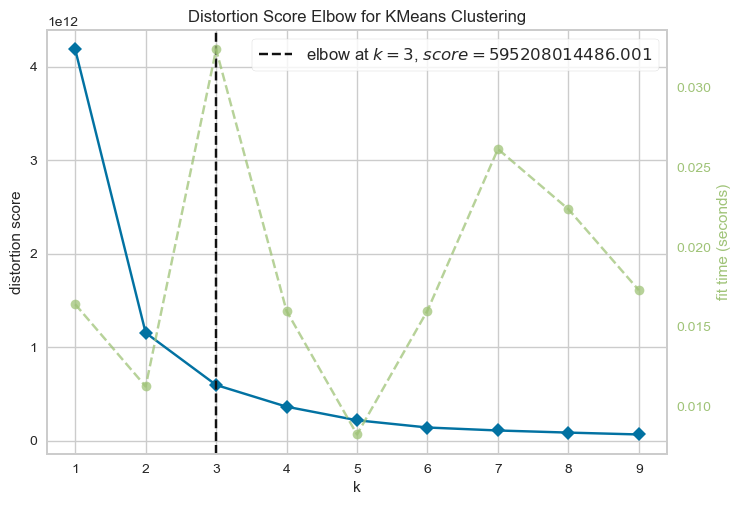

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

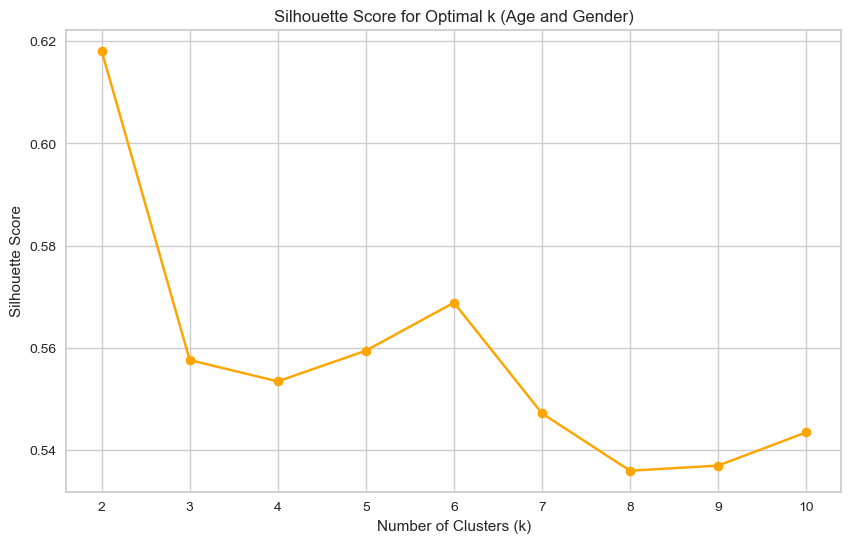

Silhouette Score: 0.557641388314325


c:\Users\ACER\anaconda3\envs\Data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [27]:
# Selecting one numerical and one categorical column for clustering
selected_columns = ['Gender (1 = Male, 0 = Female)', 'Annual Income($)']

# Standardizing the numerical column
data_selected = df[selected_columns]

# Performing K-Means clustering with the selected columns
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_selected)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_selected, cluster_labels))


# Plotting Silhouette Scores for the selected columns
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k (Age and Gender)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

silhouette_scores

# Menggunakan Silhouette Score untuk kualitas cluster
optimal_k = 3  # berdasarkan Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_selected)
data_selected['Cluster'] = kmeans.labels_
sil_score = silhouette_score(data_selected, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

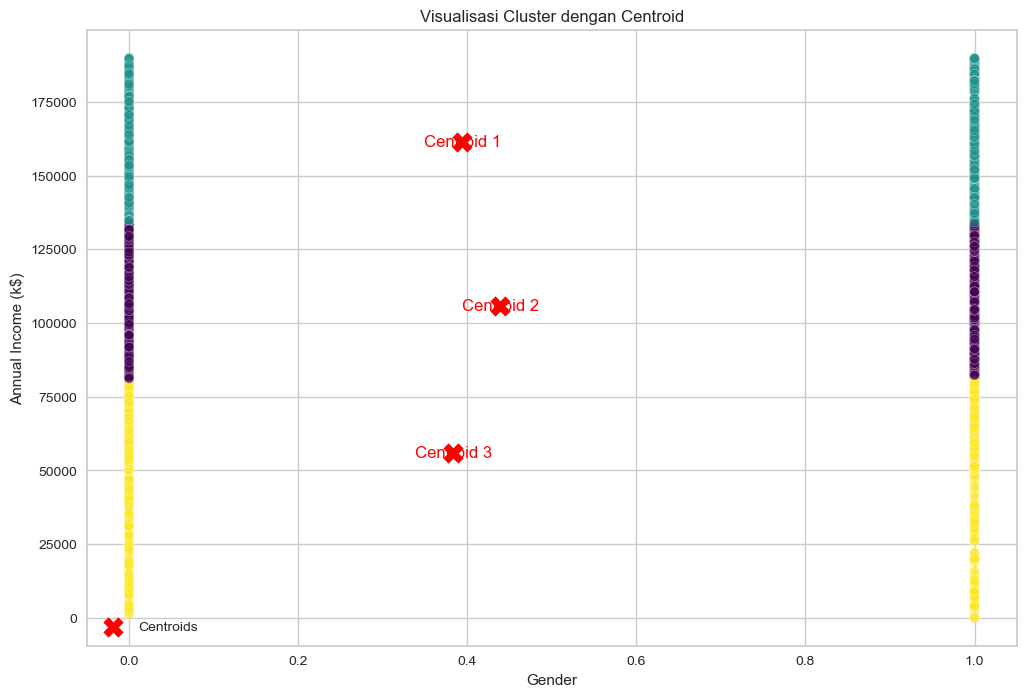

Nilai Centroids:
Centroid 1: Gender = 0.39, Annual Income = 161400.87
Centroid 2: Gender = 0.44, Annual Income = 105658.51
Centroid 3: Gender = 0.38, Annual Income = 55996.26


In [29]:
import matplotlib.pyplot as plt
 
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Gender = {centroid[0]:.2f}, Annual Income = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
 Gender : (1 = male), (0=Female)

Centroid 1 dianggap sebagai cluster 0

Centroid 2 dianggap sebagai cluster 1

Centroid 3 dianggap sebagai cluster 2



1. Cluster 0:

    Modus gender : 0

    Rata - rata gender : 0.39

    Rata - rata Annual Income (k$) : 161400.87 

    Analisis : Centroid ini mencakup pelanggan dengan pendapatan tertinggi dibanding centroid lainnya yaitu sebesar 161400.87. Centroid ini juga menunjukkan modus yaitu 0  yang menunjukkan bahwa sebagian besar gender di cluster 0 adalah wanita dengan perbandingan pria : wanita = 39 : 61


2. Cluster 1:

    Modus gender : 0

    Rata - rata gender : 0.44

    Rata - rata Annual Income (k$) : 105658.51 

    Analisis : Centroid ini mencakup pelanggan dengan pendapatan menengah yaitu sebesar 105658.51. Centroid ini juga menunjukkan modus yaitu 0 yang menunjukkan bahwa sebagian besar gender di cluster 1 adalah wanita dengan perbandingan pria : wanita = 44 : 56

3. Cluster 2:

    Modus gender : 0

    Rata - rata gender : 0.38

    Rata - rata Annual Income (k$) : 55996.26

    Analisis : Centroid ini mencakup pelanggan dengan pendapatan terendah dibanding centroid lainnya yaitu sebesar 55996.26. Centroid ini juga menunjukkan modus yaitu 0 yang menunjukkan bahwa sebagian besar gender di cluster 2 adalah wanita dengan perbandingan pria : wanita = 38 : 62


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [65]:
print(data_selected)

      Gender (1 = Male, 0 = Female)  Annual Income($)  Cluster
0                                 1             15000        2
1                                 1             35000        2
2                                 0             86000        1
3                                 0             59000        2
4                                 0             38000        2
...                             ...               ...      ...
1995                              0            184387        0
1996                              0             73158        2
1997                              1             90961        1
1998                              1            182109        0
1999                              1            110610        1

[2000 rows x 3 columns]


In [30]:
data_selected.to_csv("C:/Users/ACER/Data/Clustered_Customer.csv", index=False)